- S151c: Regelbaisertes Vortraining mit einem Single Agent
- S152c: Regelbaisertes Vortraining mit multiplen Agent
- S146:  Vergleich hierzu, kein Vortraining, von anfang an mit multiplen Agenten

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s151/20210616-1555/",
            "../checkpoints/s151/20210616-1555_ch_rwd_fn/",
            "../checkpoints/s152/20210616-1556/",
            "../checkpoints/s152/20210616-1556_ch_rwd_fn/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                           baseline_rule-based   
lr                                                 0.01   
discount_factor                                     0.9   
batch_size                                          128   
lambda_rwd_mstpc                                    0.1   
lambda_rwd_energy                                 5e-06   
reward_function                        sum_energy_mstpc   
reward_scale                                        1.0   
target_network_update_freq                            3   
epsilon_initial                                     1.0   
epsilon_final_step                                  100   
episodes_count                                      100   
agent_network                    2HiddenLayer,Trapezium   
agent_init_gain                                     0.8   
agent_w_l2                                        1e-05   
network_storage_frequency                            10   
shared_network_per_agent_class                        0   
model                           Building_5ZoneAirCooled   
next_occ_horizont                                     0   
load_models_from_path                                     
eplus_storage_mode                                    0   

                                                                             s151  \
algorithm                                                                    ddqn   
lr                                                                          0.085   
discount_factor                                                              0.85   
batch_size                                                                    256   
lambda_rwd_mstpc                                                              0.1   
lambda_rwd_energy                                                           5e-06   
reward_function                                            rulebased_agent_output   
reward_scale                                                                  0.3   
target_network_update_freq                                                      6   
epsilon_initial                                                               1.0   
epsilon_final_step                                                          25500   
episodes_count                                                                150   
agent_network                                         2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                              0.56   
agent_w_l2                                                                  1e-06   
network_storage_frequency                                                     150   
shared_network_per_agent_class                                                  1   
model                           Building_5ZoneAirCooled_SingleSetpoint_SingleA...   
next_occ_horizont                                                               2   
load_models_from_path                                                               
eplus_storage_mode                                                              1   

                                                                           s151_3  \
algorithm                                                                    ddqn   
lr                                                                           0.01   
discount_factor                                                              0.85   
batch_size                                                                    256   
lambda_rwd_mstpc                                                             0.15   
lambda_rwd_energy                                                         2.5e-06   
reward_function                                                  sum_energy_mstpc   
reward_scale                                                                  0.5   
target_network_update_freq                                                      6   
epsilon_initial                

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001          s151  \
Number of training episodes                      1.0  25500.000000   
Runtime in s                                     0.0  26093.701158   
Runtime in h                                     0.0      7.248250   
Mean episode runtime in s                        0.0      1.023282   
Mean episode runtime during eval. episode in s   0.0      1.110747   
Mean episode runtime after eval. episode in s    NaN      3.982658   
Mean episode runtime in no eval. episode in s    NaN      1.022695   

                                                        s151          s152  \
Number of training episodes                     18000.000000  22500.000000   
Runtime in s                                    87746.400721  32362.719137   
Runtime in h                                       24.374000      8.989644   
Mean episode runtime in s                           4.874800      1.438343   
Mean episode runtime during eval. episode in s      4.748401      1.554885   
Mean episode runtime after eval. episode in s       4.856756      4.892824   
Mean episode runtime in no eval. episode in s       4.875648      1.437561   

                                                        s152  
Number of training episodes                     12320.000000  
Runtime in s                                    59370.346177  
Runtime in h                                       16.491763  
Mean episode runtime in s                           4.819022  
Mean episode runtime during eval. episode in s      4.770146  
Mean episode runtime after eval. episode in s       4.735252  
Mean episode runtime in no eval. episode in s       4.819583

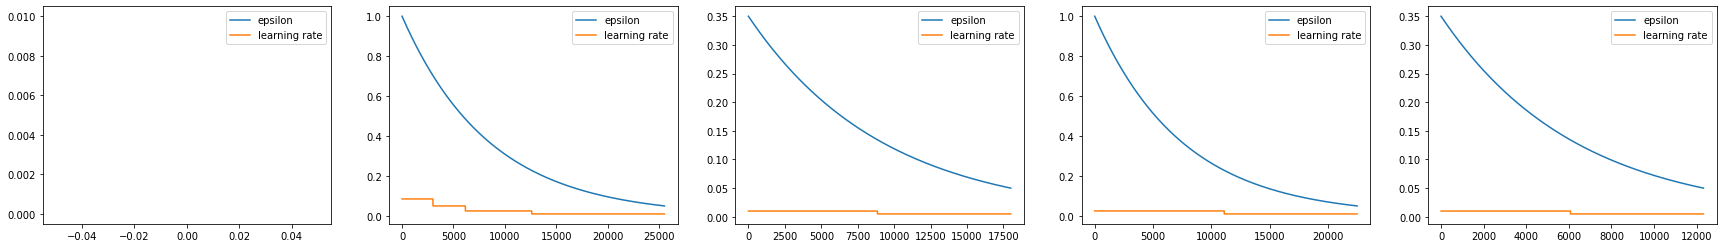

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

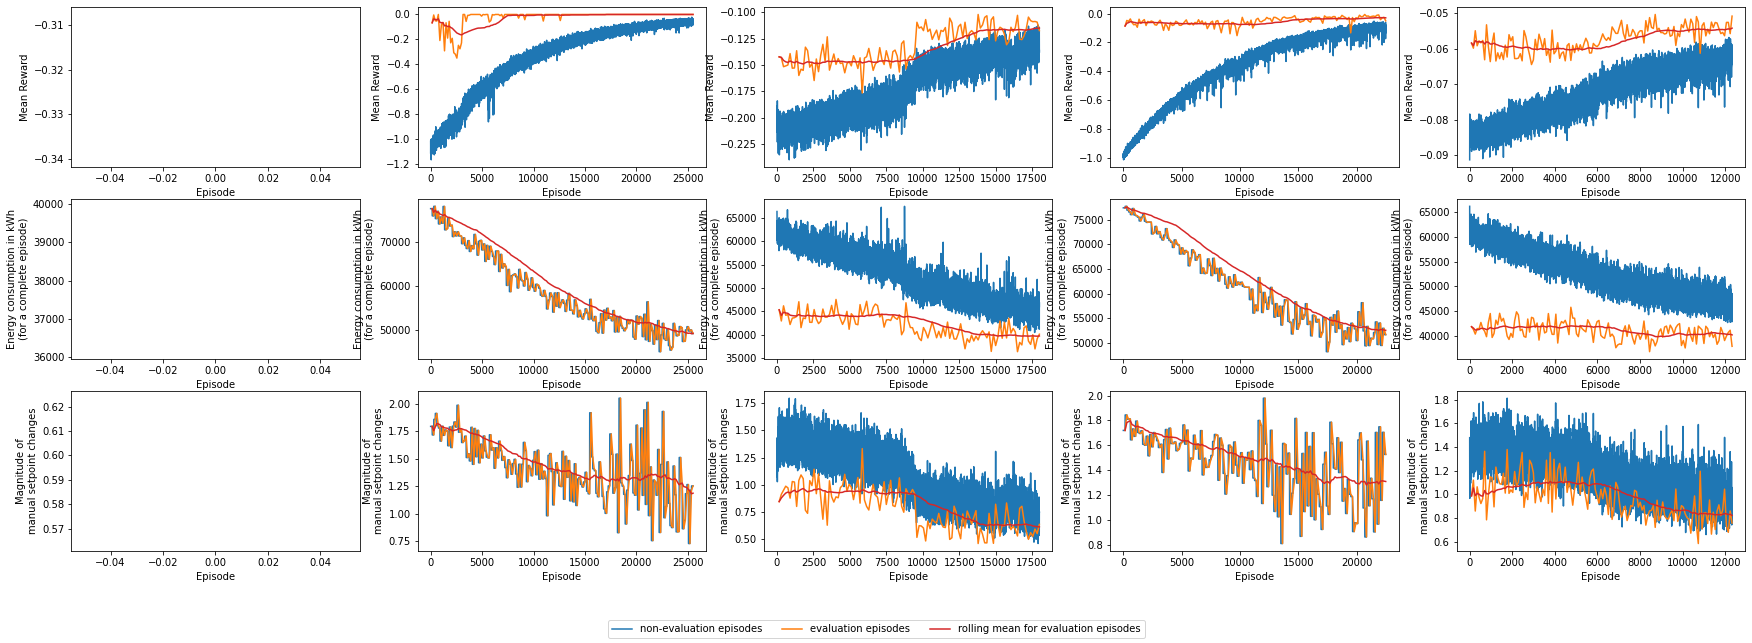

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

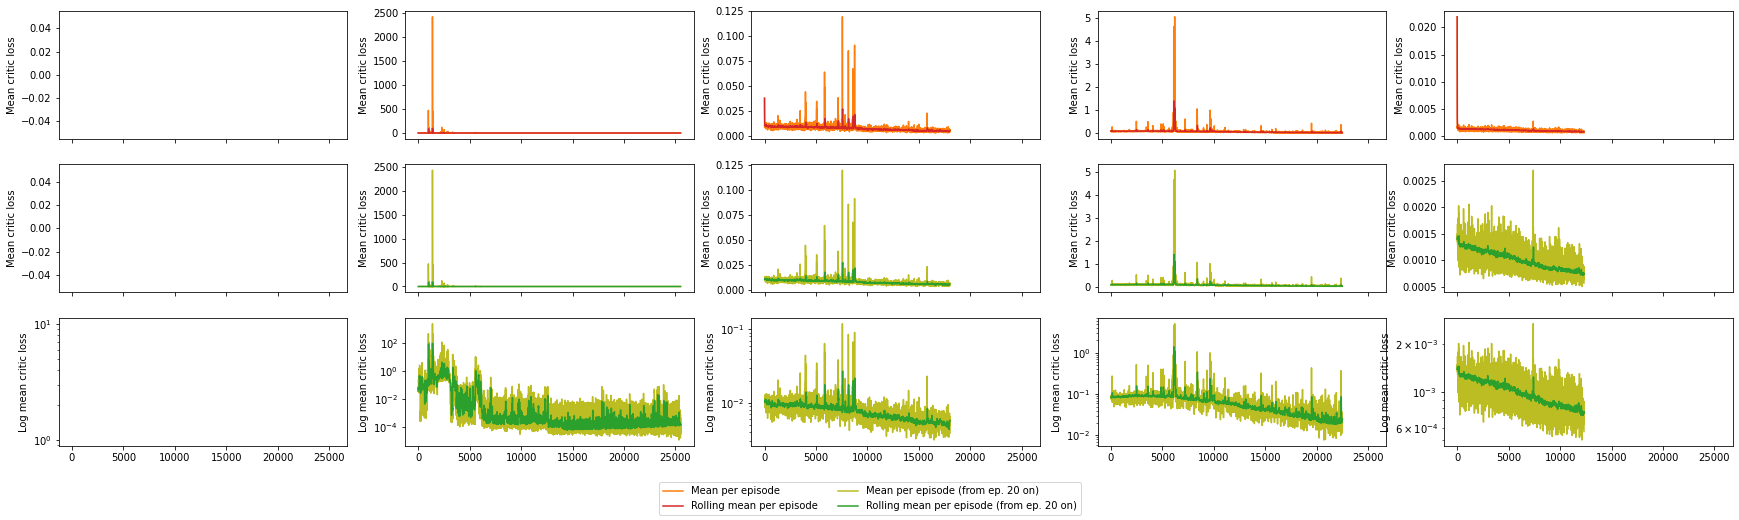

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

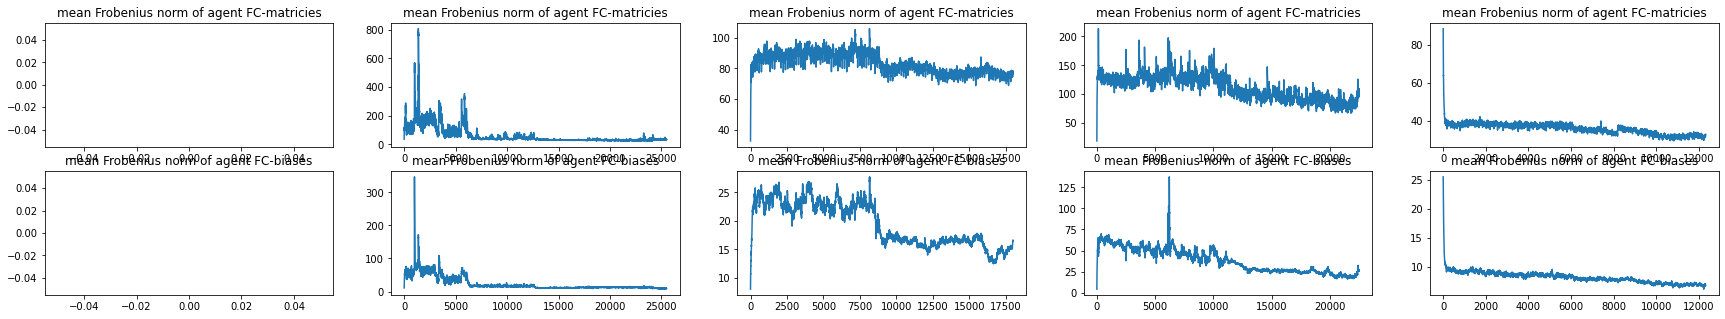

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  25499
Last available evaluation episode for dfs2:  17999
Last available evaluation episode for dfs3:  22499
Last available evaluation episode for dfs4:  12319


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 25499: Energy consumption:   49098.57 kWh; Sum of setpoint change magnitudes: 900.0499227448103
For episode 17999: Energy consumption:   40118.11 kWh; Sum of setpoint change magnitudes: 458.1364577433891
For episode 22499: Energy consumption:   51712.14 kWh; Sum of setpoint change magnitudes: 1097.9358556315515
For episode 12319: Energy consumption:   37862.23 kWh; Sum of setpoint change magnitudes: 543.7341383398884

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 25499: Reward:  0.00000 kWh; Setpoint change magnit.:  1.25181; Energy cons.: 68287.30163
... 17999: Reward: -0.11754 kWh; Setpoint change magnit.:  0.63719; Energy cons.: 55797.09102
... 22499: Reward: -0.04934 kWh; Setpoint change magnit.:  1.52703; Energy cons.: 71922.31440
... 12319: 

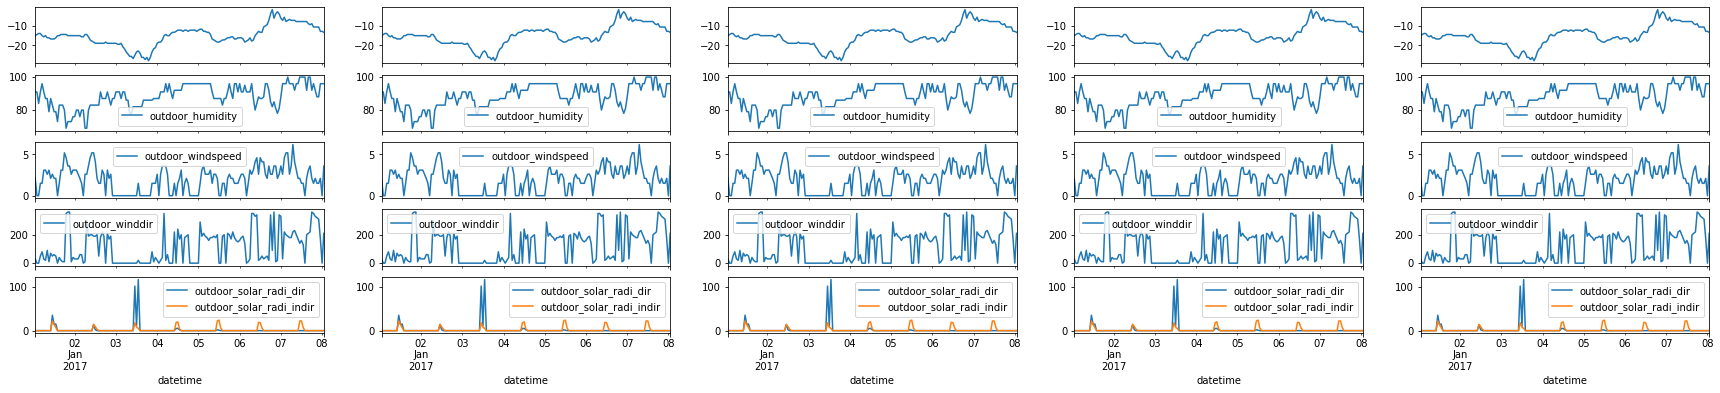

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

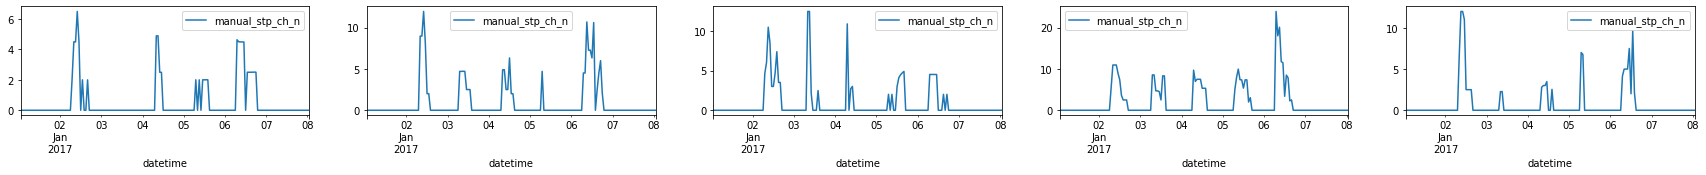

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

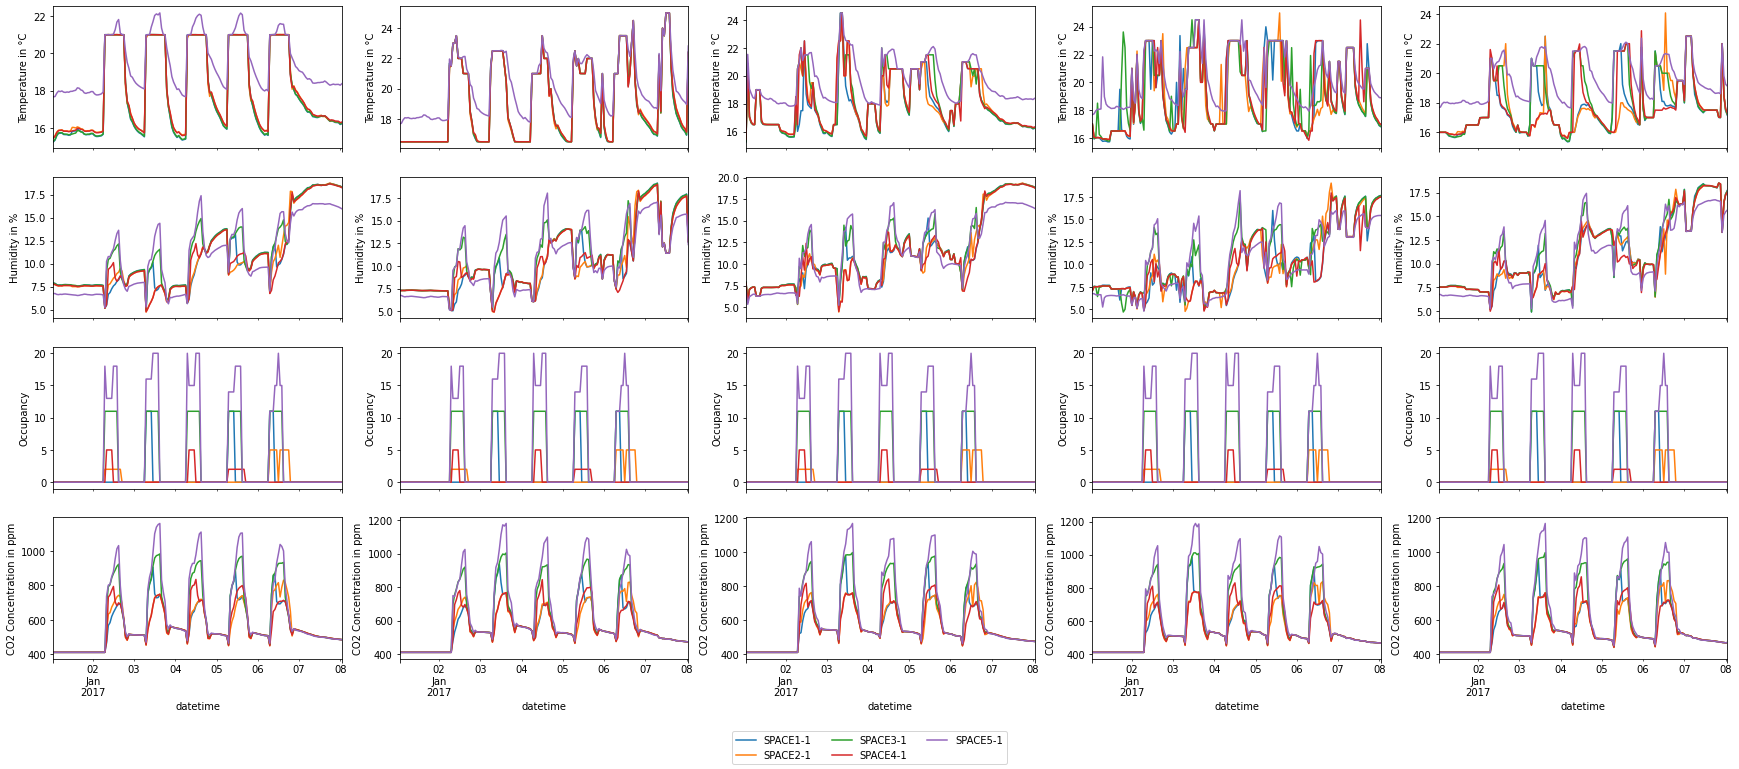

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'all': 0} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 



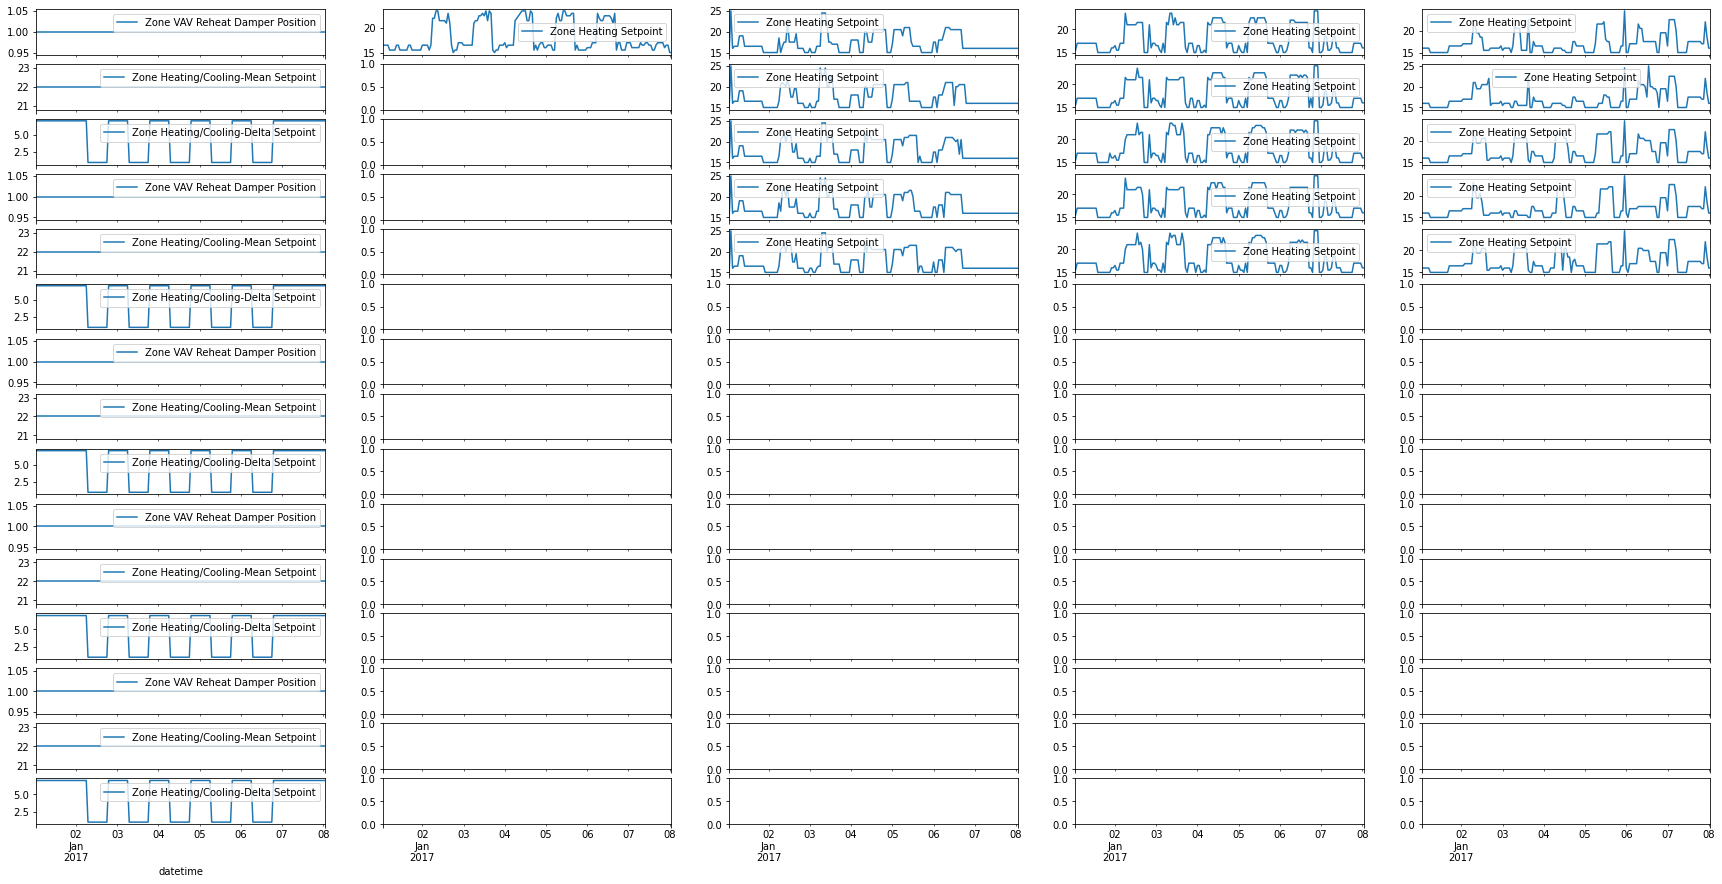

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

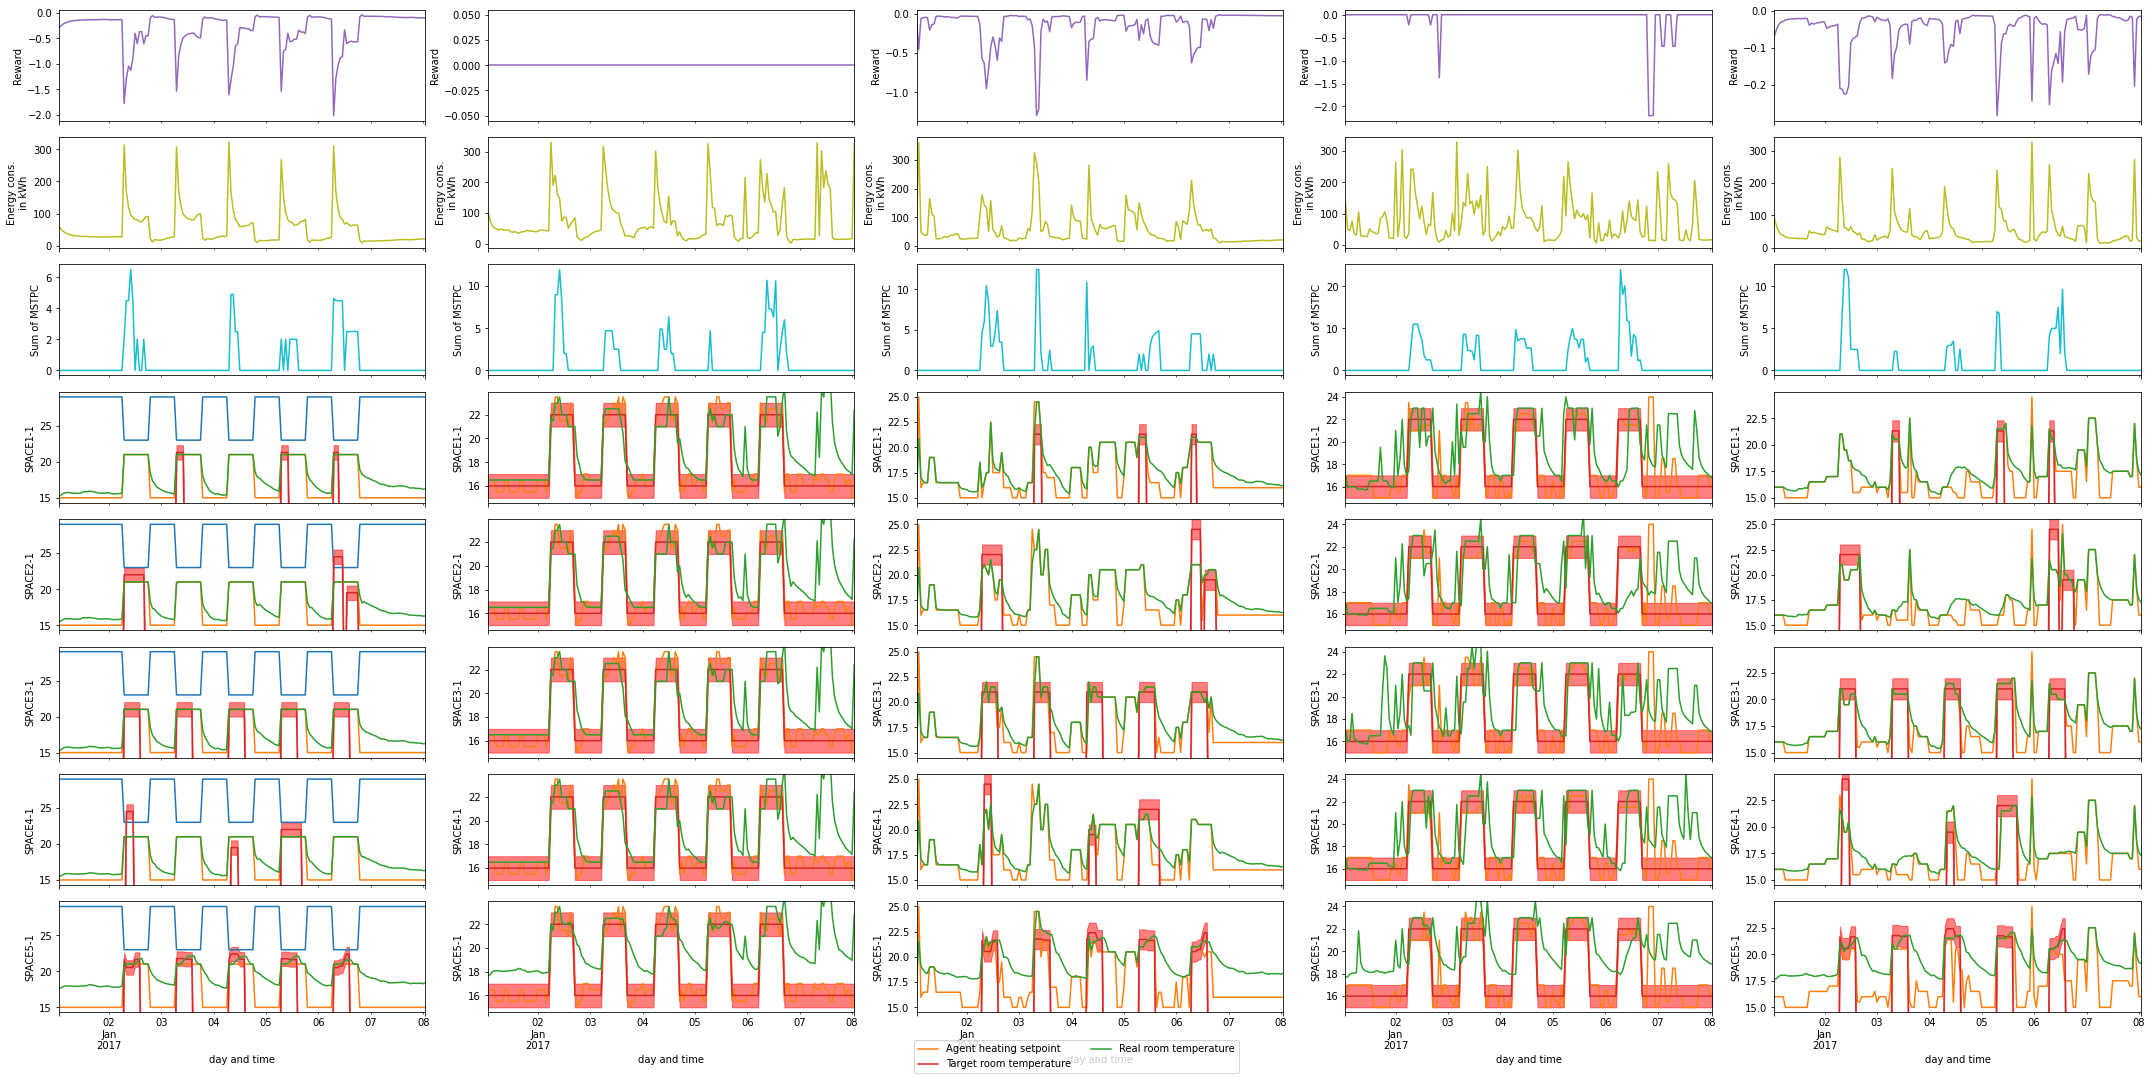

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

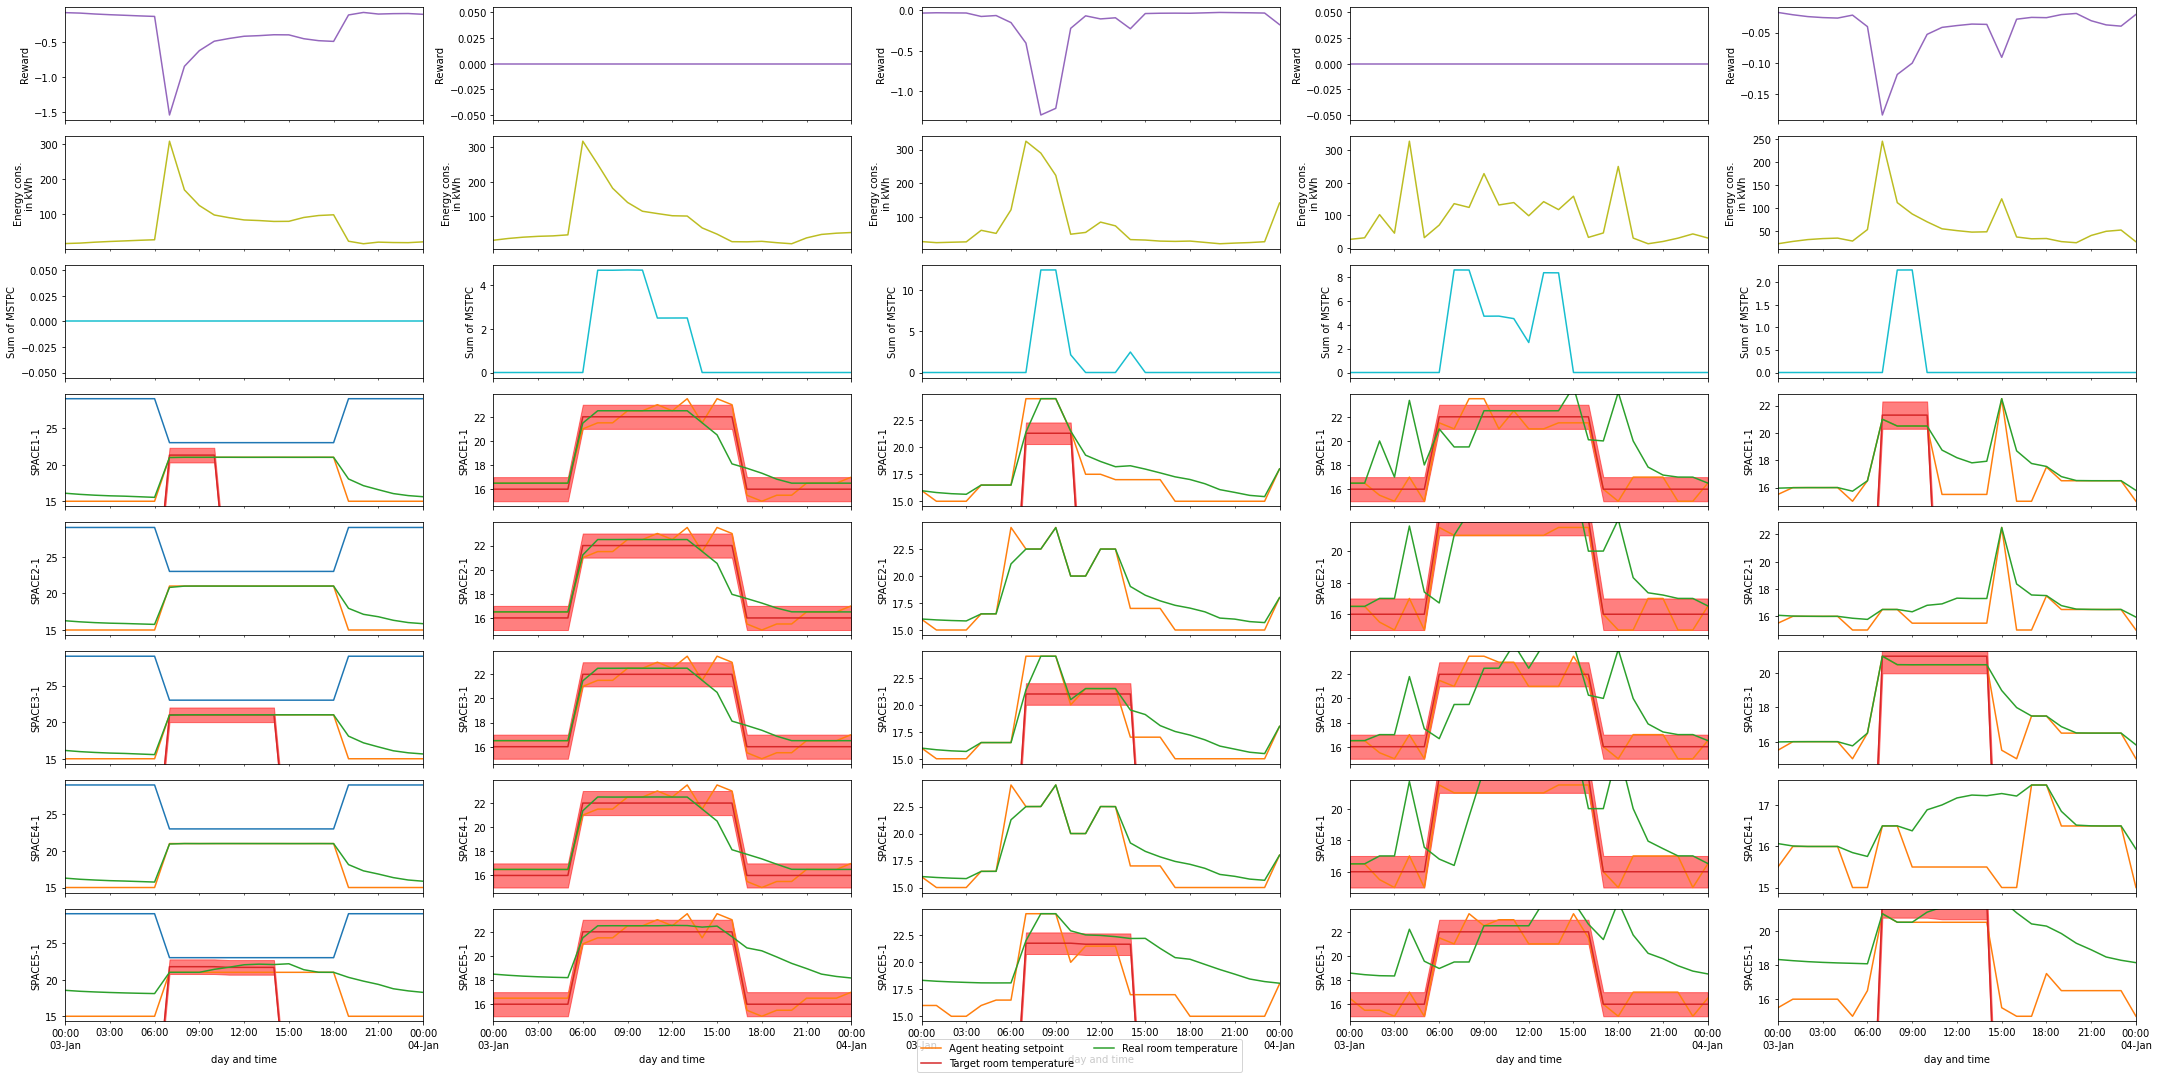

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  67383.4 Wh, mean reward =  0.0000
For plot number 3, mean energy consumption =  55198.0 Wh, mean reward = -0.1159
For plot number 4, mean energy consumption =  70941.0 Wh, mean reward = -0.0510
For plot number 5, mean energy consumption =  51393.8 Wh, mean reward = -0.0494


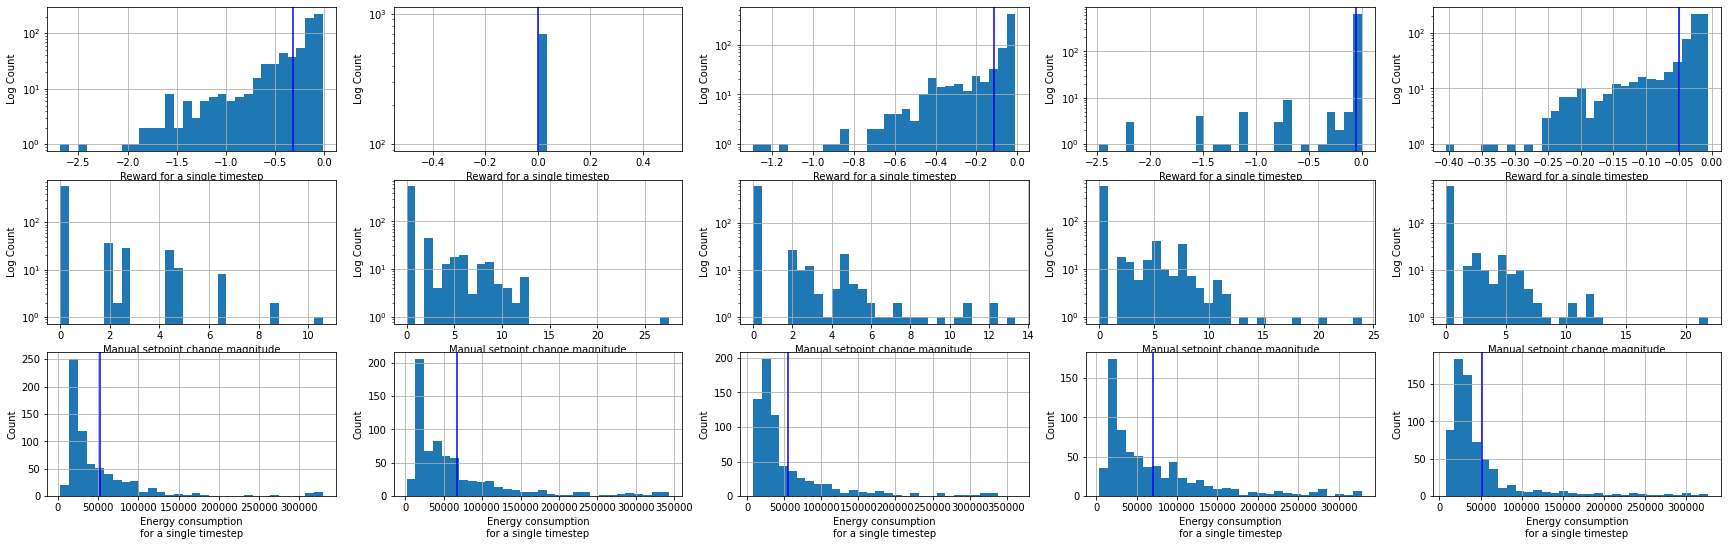

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

IndexError: index 5 is out of bounds for axis 0 with size 5

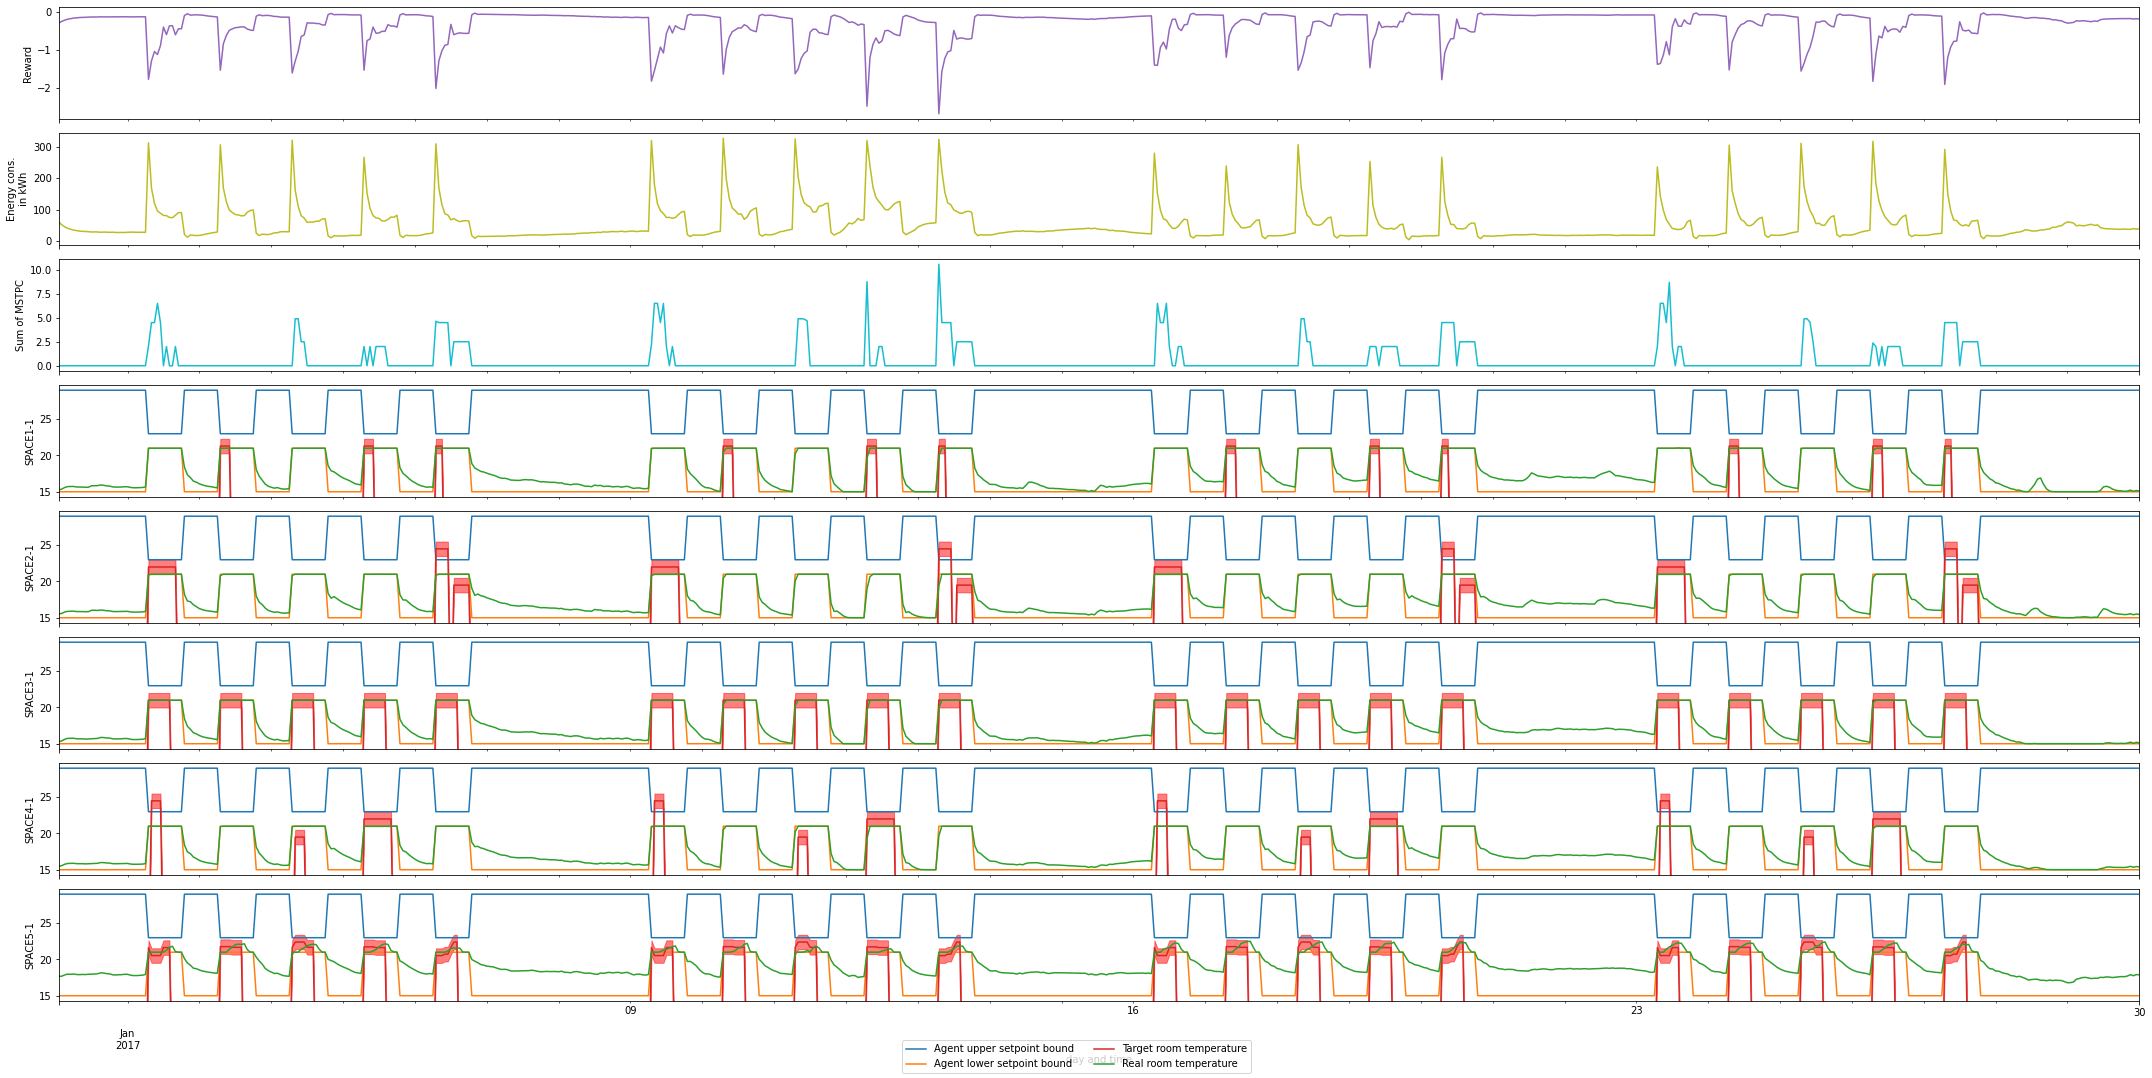

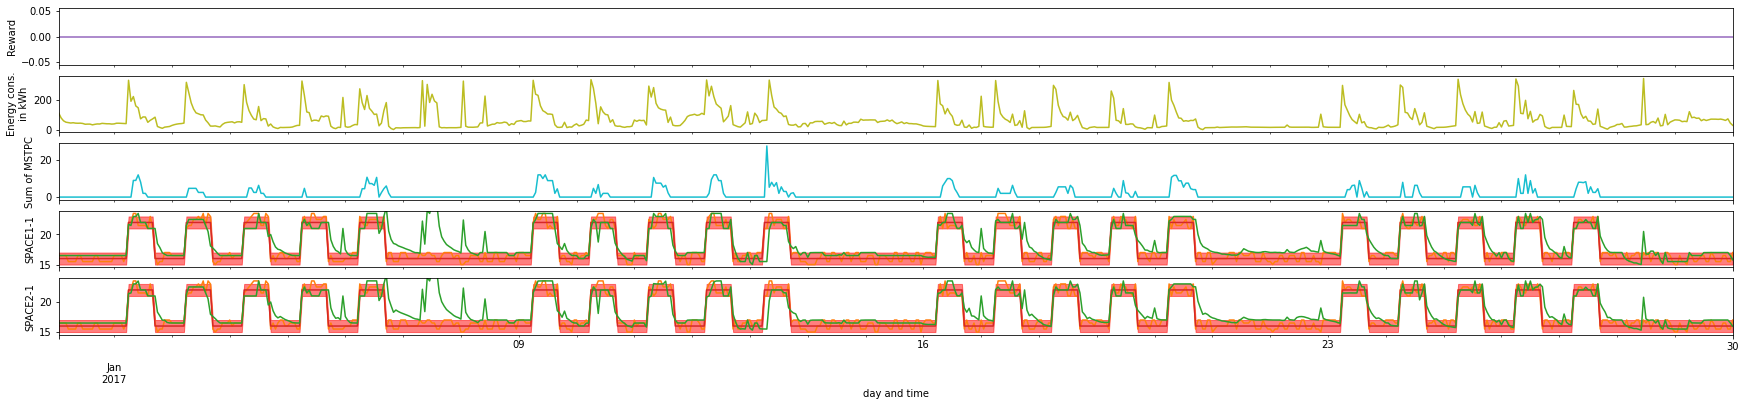

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

(<Figure size 2160x3456 with 32 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s151\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s151\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s151\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 2: s151\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 2: s151\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 2: s151\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 3: s152\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s152\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 3: s152\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 3: s152\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 3: s152\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 4: s152\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 4: s152\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 4: s152\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 4: s152\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 4: s152\nAgent 4'>], dtype=object))

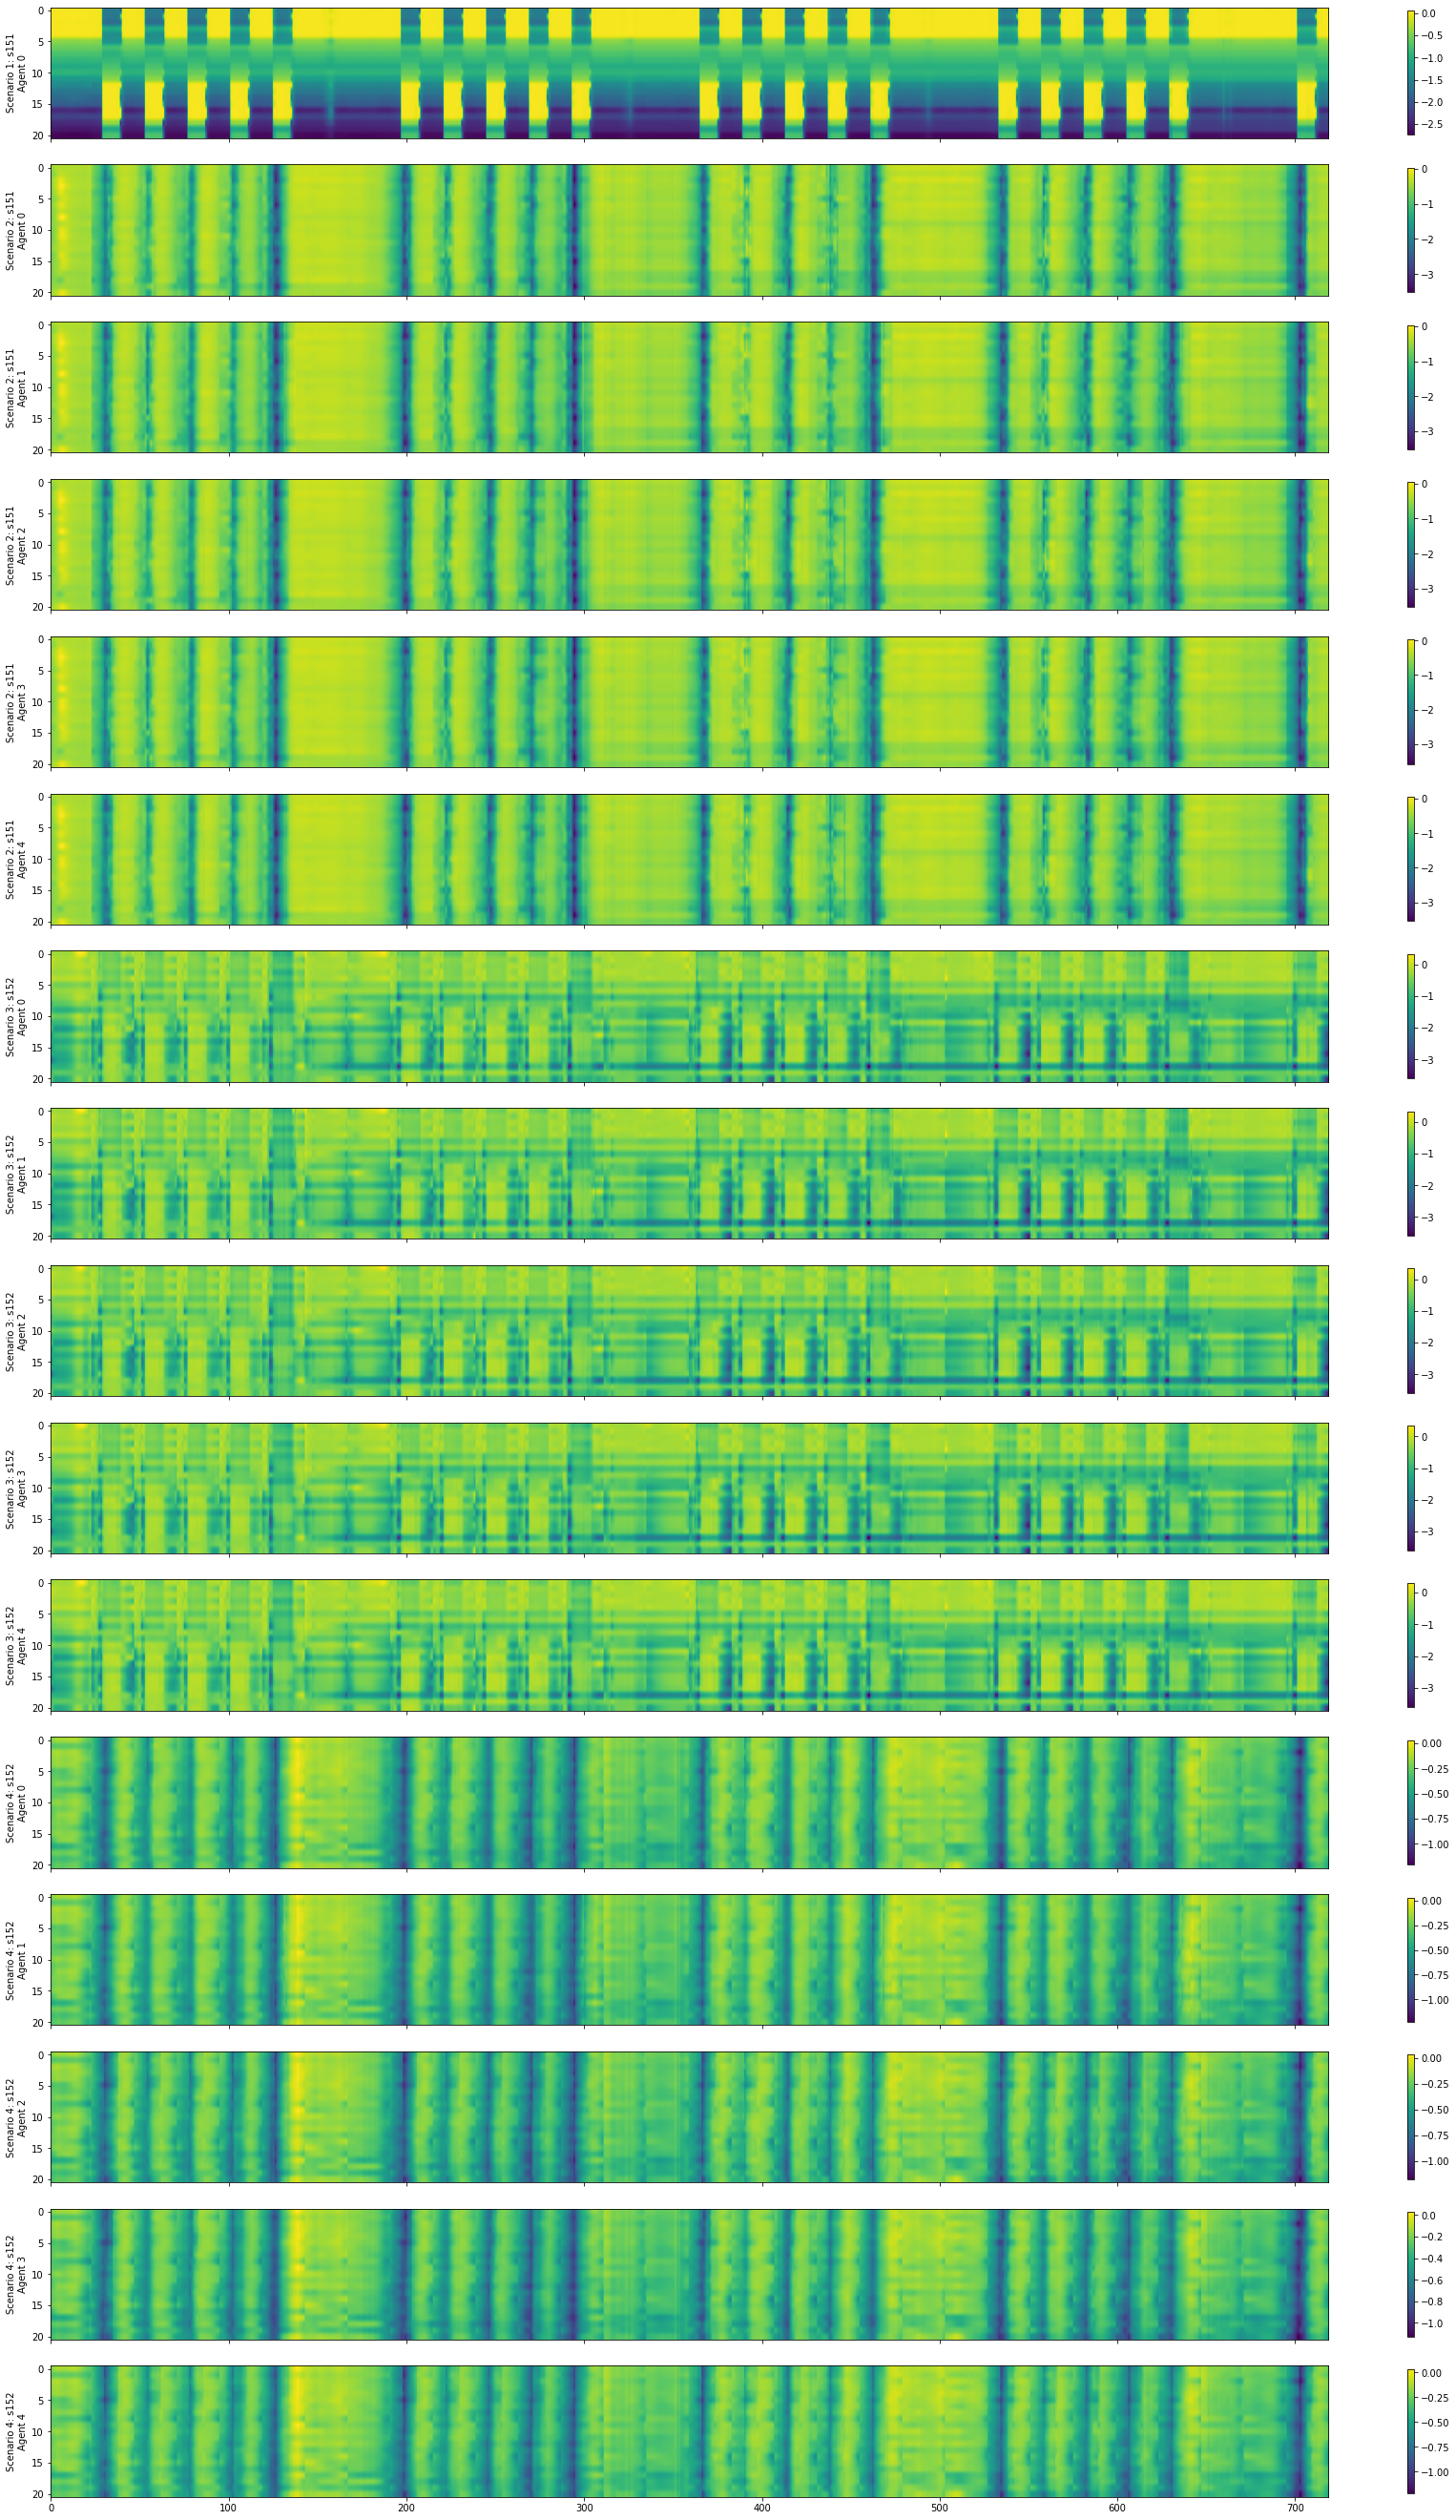

In [33]:
vh.plot_q_values(q_values, fig_width)

Outputs for thesis

In [34]:
f = open(dirnames[1] + "RewardDistributionEval/best-results.pickle", "rb")
best_results = pickle.load(f)
f.close()

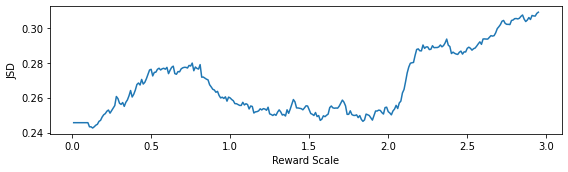

In [35]:
plt.figure(figsize=(8,2.5))
#plt.title("JSD(reward scale)")
plt.plot(best_results['all_jsds_rscales'], best_results['all_jsds'])
plt.ylabel("JSD")
plt.xlabel("Reward Scale")
plt.tight_layout()
#plt.savefig("saved_plots/Pretraining_s151_reward_dist.png")
#plt.savefig("saved_plots/Pretraining_s151_reward_dist.pdf")

In [36]:
print(f"Minimal JSD is {best_results['best_jds']} for scale = {best_results['best_reward_scale']}")

Minimal JSD is 0.24259101863396146 for scale = 0.13


In [37]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [38]:
import matplotlib.lines as mlines

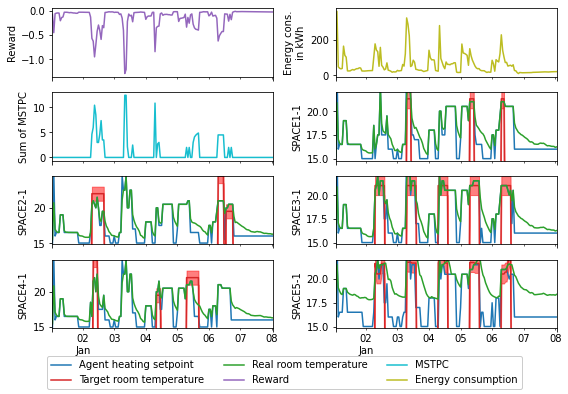

In [40]:
p, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(8,5.5))
_, _ = vh.complete_plot_total_overview(subdfs[2], 8, subdfs_rooms[2], subdfs_agents[2],
                                       fig_height=5, heating_setpoint_color='tab:blue',
                                       framealpha=1, cols_legend=3,
                                       axes=axes.reshape(8,-1))

purple_patch = mlines.Line2D([], [], color='tab:purple', label='Reward', linestyle='-')
cyan_patch   = mlines.Line2D([], [], color='tab:cyan', label='MSTPC', linestyle='-')
olive_patch   = mlines.Line2D([], [], color='tab:olive', label='Energy cons.', linestyle='-')

handles, labels = axes[1,1].get_legend_handles_labels()
handles.append(purple_patch)
labels.append("Reward")
handles.append(cyan_patch)
labels.append("MSTPC")
handles.append(olive_patch)
labels.append("Energy consumption")

axes[2,0].set_ylim((14.8,24.5))
axes[3,0].set_ylim((14.8,24.5))
axes[1,1].set_ylim((14.8,22))
axes[2,1].set_ylim((14.8,22))
axes[3,1].set_ylim((14.8,22))

p.legend(handles, labels, loc='lower center', ncol=3, framealpha=1)
p.tight_layout()
p.show()
#p.savefig("saved_plots/MA_s151_TestWeek_overview.png")
#p.savefig("saved_plots/MA_s151_TestWeek_overview.pdf")

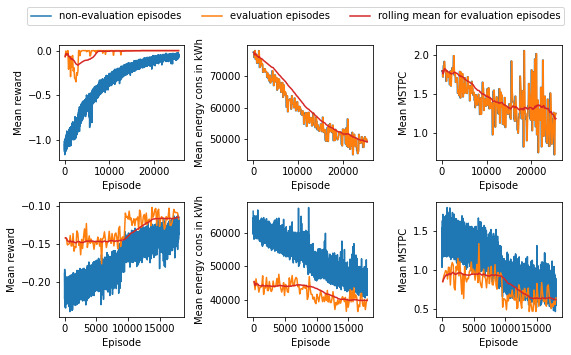

In [52]:
p, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,4.5))
vh.plot_eels_reward(alldfs[1], ax[0,:], ylabels=["Mean reward", "Mean energy cons in kWh", "Mean MSTPC"])
vh.plot_eels_reward(alldfs[2], ax[1,:], ylabels=["Mean reward", "Mean energy cons in kWh", "Mean MSTPC"])
p.tight_layout()
handles, labels = ax[0,0].get_legend_handles_labels()
p.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.52,1.1))
#p.savefig("saved_plots/MA_s151_reward.png", bbox_inches="tight")
#p.savefig("saved_plots/MA_s151_reward.pdf", bbox_inches="tight")

array([<AxesSubplot:ylabel='Mean reward'>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)